# Linear Regression

1- What is the main difference between simple and multiple linear regression?

- Simple LR prediction using single independent feature while multiple linear regression using 2 or more independent variables.

2- How do you evaluate the performance of a linear regression model?

- Using several statistical metrics and methods like R^2, Adjusted R^2, MSE, MAE, RMSE, etc.

3- How do you evaluate the performance of a linear regression model?

- Using several statistical metrics and methods like R^2, Adjusted R^2, MSE, MAE, RMSE, etc.

4- What is the purpose of regularization in linear regression? How does L1 regularization differ from L2 regularization?

- Regularisation in LR used to prevent overfitting by feature selection, handling multicollinearity, etc.

L1- eliminates the irrelevat features
while
L2- does not eliminate but rather reduces the importance of feature which are less related to the label.

# Logistic Regression

1- How does logistic regression differ from linear regression in terms of its application?

- Logistic regression is used for binary classification problems which only have 2 values as output or categorical data
- EG: Spam email detection, Disease diagnosis, Customer churn prediction.
  
- But linear regression can be used for regression problems where the target variable is continuous (e.g., predicting house prices).
- EG: Predicting house prices, Forecasting stock values, Estimating sales growth.
  
2- What is the sigmoid function, and why is it used in logistic regression?

- The sigmoid function is a mathematical function which maps any real-valued number into a range between 0 and 1.
- It is used for probability mapping and classification threshold.
  
3- What is multicollinearity problem and how you solve the multicollinearity problem ? 

- Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, meaning they contain redundant information.
- How to Solve the Multicollinearity Problem:
1. Remove Highly Correlated Predictors
2. Combine Predictors
3. Regularization

# Decision Trees

1- How does a decision tree algorithm work, and how does it make predictions?

- A decision tree algorithm recursively splits the dataset into subsets based on feature values. Best feature is selected to split the tree. Braches of the tree are the different outcome based on previous input selected and Leaf nodes are the final prediciton.
- Predictions or outcomes are made by traversing the tree from the root to a leaf node based on the feature values of the input sample, where the leaf node contains the predicted class label (classification) or value (regression).
  
2- What are the criteria used to split a node in a decision tree (e.g., Gini impurity, Information Gain)?

- Gini Impurity: Measures the likelihood of a randomly chosen element being misclassified in a dataset.

- Information Gain (based on Entropy): Measures the reduction in entropy after a split.

- Mean Squared Error (MSE) (for regression): Measures variance reduction

3- What is overfitting in decision trees, and how can it be prevented?

- Overfitting in decision tree means that the model favours a feature more than other features so the prediction made is biased or in favour of that feature which can reduce the accuracy of our model.
- How can it be prevented:
  1. Pruning
  2. Restrict Tree Depth
  3. Regularization Parameters
     
4- How do you decide the maximum depth of a decision tree? 

- Set the maximum depth based on cross-validation to balance bias and variance, or by considering domain knowledge and dataset size.

# Ensemble Techniques

1- What is an ensemble learning technique, and why is it used in machine learning?

- Ensemble learning combines predictions from multiple models (e.g., decision trees) to improve accuracy, robustness, and generalization compared to individual models.

2- What is bootstrap=True in Ensemble technique ?

- It enables sampling with replacement, allowing the creation of multiple datasets from the original data for training models.

3- What is pasting ?

- Pasting is a technique similar to Bagging, but it involves sampling without replacement, ensuring no duplicate samples in the training subsets.

4- What is OOB method ?

- OOB is a validation method in Bagging where predictions for a sample are made using only the models trained on data subsets that do not include that sample.

# Model Creation

Create a Linear Regression model and apply regularization using the dataset from this link. Ensure that both Lasso and Ridge regularization are used, and perform feature selection using VIF. Follow the same process as before, including handling null values, removing duplicate rows, and performing necessary data visualization and plotting.

Link - https://raw.githubusercontent.com/s4sauravv/Datasets/refs/heads/main/Admission_Prediction.csv

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [98]:
data_ad=pd.read_csv(r"C:\Users\sharm\Downloads\Admission_Predict500.csv")
data_ad

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,NaN,4.5,4.5,9.65,1,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3.0,316.0,104.0,NaN,3.0,3.5,8.00,1,0.72
3,4.0,NaN,NaN,3.0,3.5,2.5,8.67,1,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,NaN,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498.0,330.0,120.0,NaN,4.5,5.0,9.56,1,0.93
498,499.0,NaN,103.0,4.0,4.0,5.0,8.43,0,0.73


In [100]:
data_ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,NaN,4.5,4.5,9.65,1,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3.0,316.0,104.0,NaN,3.0,3.5,8.00,1,0.72
3,4.0,NaN,NaN,3.0,3.5,2.5,8.67,1,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [102]:
data_ad.shape

(500, 9)

In [104]:
#Lets Delete the unwanted columns
data_ad.drop(columns=['Serial No.'],inplace=True)

In [106]:
data_ad.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,496.000000,498.000000,496.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.471774,107.182731,3.106855,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.301167,6.092244,1.143569,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [108]:
#as you can see theres null values present in the dataset so we remove them as follows

#use mean for continuous feature
data_ad['GRE Score']=data_ad['GRE Score'].fillna(data_ad['GRE Score'].mean())
data_ad['TOEFL Score']=data_ad['TOEFL Score'].fillna(data_ad['TOEFL Score'].mean())

#use mode for categorical feature
data_ad['University Rating']=data_ad['University Rating'].fillna(data_ad['University Rating'].mode()[0])

In [110]:
data_ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.000000,3.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.000000,4.0,4.0,4.5,8.87,1,0.76
2,316.000000,104.000000,3.0,3.0,3.5,8.00,1,0.72
3,316.471774,107.182731,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.000000,2.0,2.0,3.0,8.21,0,0.65


In [112]:
#check to see if null values are filled
data_ad.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.471774,107.182731,3.106000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.255781,6.080023,1.139017,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.735887,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


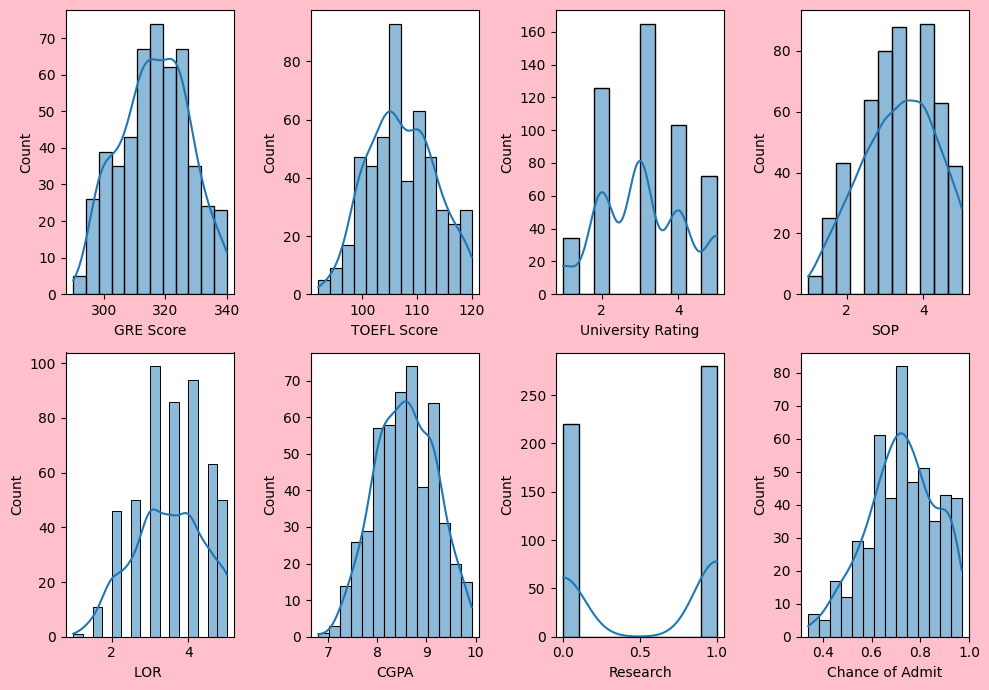

In [115]:
plt.figure(figsize=(10,7), facecolor='pink')
plotnumber=1
for column in data_ad:
    if plotnumber<=8:
        axs=plt.subplot(2,4,plotnumber)
        #ax=axs: This specifies the axes (axs) of the subplot where the plot will be drawn.
        #kde=True: This argument adds a Kernel Density Estimate (KDE) curve to the histogram.
        sns.histplot(data_ad[column], ax=axs, kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

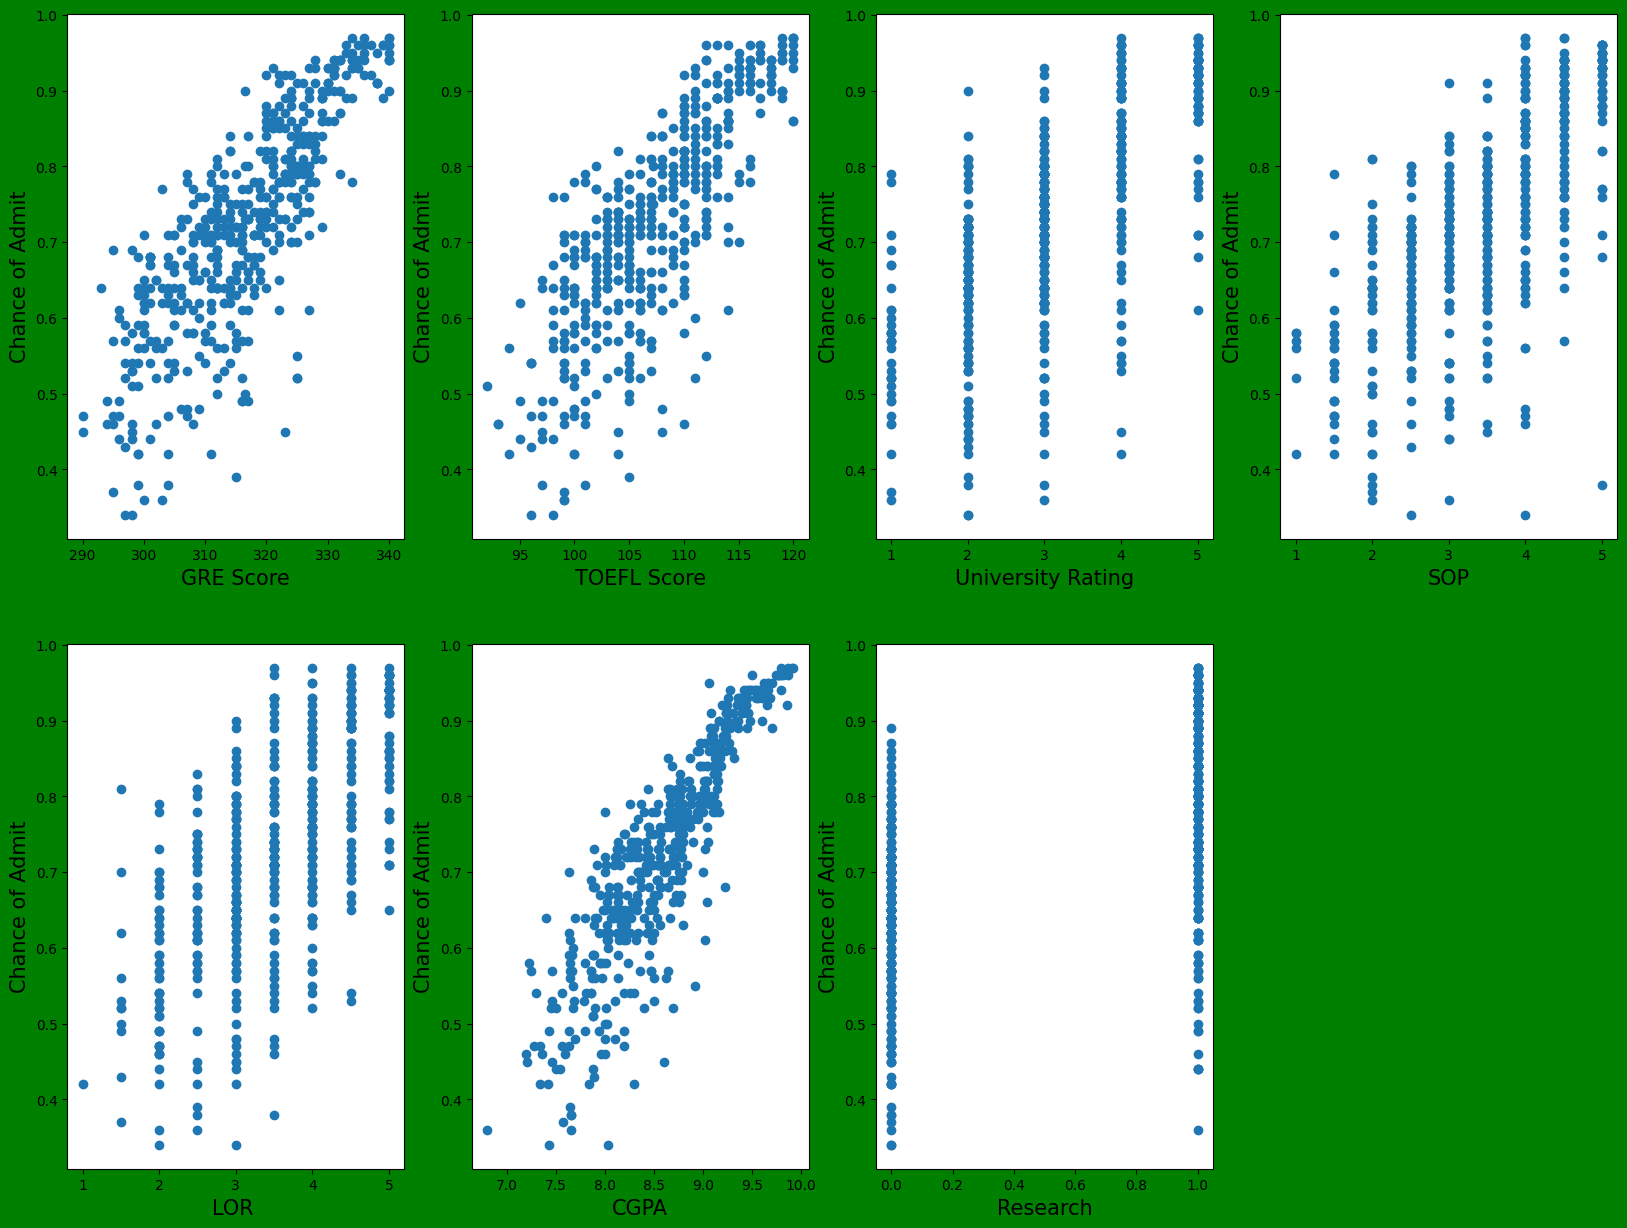

In [117]:
#plot a graph with features vs label

y=data_ad['Chance of Admit']
x=data_ad.drop(columns=['Chance of Admit'])

plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber<=8:
        axs=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Chance of Admit',fontsize=15)
    plotnumber+=1
plt.show()

In [125]:
#now we standardise the data

scaler=StandardScaler()

In [170]:
#standarize x
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.82562061e+00,  1.78093127e+00, -9.31559411e-02, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.69501803e-01, -3.00844154e-02,  7.85673692e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [-4.19559244e-02, -5.23997784e-01, -9.31559411e-02, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.20309510e+00,  2.11020685e+00, -9.31559411e-02, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [ 5.05521120e-15, -6.88635574e-01,  7.85673692e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.36298451e-01,  9.57742323e-01, -9.31559411e-02, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [264]:
#Now do Train test split

xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y, test_size=0.20, random_state=0)

In [267]:
#create a linear regression model

model=LinearRegression()

In [269]:
xtrain.shape

(400, 7)

In [271]:
ytrain.shape

(400,)

In [273]:
#train the machine learning model using the training data.

model.fit(xtrain,ytrain)

LinearRegression()

In [275]:
#Check with one data how good is our model
data_ad.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,316.471774,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.000000,113.0,3.0,4.5,4.5,9.04,0,0.84


In [277]:
#transform: This ensures that the new input is on the same scale as the data used to train the model.
model.predict(scaler.transform([[316.471774,103.0,4.0,4.0,5.0,8.43,0]]))

C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.7140249])

In [279]:
#Now check How good is our model 
trainscore=model.score(xtrain,ytrain)
print(trainscore)

0.8311201556947128


In [281]:
testscore=model.score(xtest,ytest)
print(testscore)

0.7670898814177369


In [285]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [295]:
#Its give us it good and model we made is also good
import numpy as np

# Make predictions on the test data
y_pred = model.predict(xtest)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(ytest, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(ytest, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 0.04822645820715751
MSE: 0.004067716993509578
RMSE: 0.06377865625355851


## Regularization

### Lasso

In [297]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm


lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(xtrain,ytrain)

LassoCV(max_iter=100)

In [303]:
#normalize

#best alpha paremetere
alpha=lasscv.alpha_
print(alpha)

0.0008381836085067159


In [305]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before

lasso_reg=Lasso(alpha)
lasso_reg.fit(xtrain,ytrain)

Lasso(alpha=np.float64(0.0008381836085067159))

In [307]:
lasso_reg.score(xtest,ytest)

0.7684875101001365

### Ridge

In [312]:
#Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(xtrain,ytrain)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [314]:
#normalize

#best alpha paremetere
alpha=ridgecv.alpha_
print(alpha)

0.09099999999999998


In [316]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before

lasso_reg=Ridge(alpha)
lasso_reg.fit(xtrain,ytrain)

Ridge(alpha=np.float64(0.09099999999999998))

In [318]:
lasso_reg.score(xtest,ytest)

0.7670881196322991

In [321]:
x_scaled.shape

(500, 7)

In [325]:
#Finding Variance inflation factor is each scaled column i.e x_scaled.shape[1] (1/(1=R2))
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns


#Lets Check the Values 
vif

,vif,Features
0,4.327848,GRE Score
1,3.875944,TOEFL Score
2,2.542368,University Rating
3,2.831605,SOP
4,2.027031,LOR
5,4.763695,CGPA
6,1.485897,Research


In [327]:
#1 < VIF < 5: Moderate correlation.
#all the vif are less than 5 so no multiocllinearity exists

In [329]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y, test_size=0.20, random_state=0)

In [331]:
model=LinearRegression()

In [333]:
model.fit(xtrain,ytrain)

LinearRegression()

In [337]:
y_pred=model.predict(xtest)
y_pred

array([0.6590176 , 0.83487724, 0.7786997 , 0.88106464, 0.60353239,
       0.64318755, 0.53172377, 0.69748644, 0.52552211, 0.74532985,
       0.60934501, 0.70843967, 0.62084114, 0.75459988, 0.88433398,
       0.50940409, 0.82442489, 0.64430977, 0.76413984, 0.53384069,
       0.51617541, 0.72205395, 0.52133986, 0.92222846, 0.834533  ,
       0.72591921, 0.69807049, 0.50600019, 0.58185622, 0.59585732,
       0.72613732, 0.48530797, 0.65572145, 0.84211317, 0.5626027 ,
       0.59969249, 0.84373813, 0.8683225 , 0.59175459, 0.65992066,
       0.66901635, 0.90272886, 0.86609684, 0.72188812, 0.77269133,
       0.80661706, 0.97135353, 0.85145665, 0.6425733 , 0.65452764,
       0.63215677, 0.63605333, 0.61340658, 0.80073425, 0.69575805,
       0.85564014, 0.52628602, 0.86376292, 0.60089502, 0.63697495,
       0.49905981, 0.90781251, 0.61933345, 0.94757635, 0.71880874,
       0.61641714, 0.73461377, 0.84430407, 0.51941094, 0.7772742 ,
       0.89573105, 0.78336994, 0.69840565, 0.63922946, 0.79029

In [349]:
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.04822645820715751
MSE: 0.004067716993509578
RMSE: 0.06377865625355851
